## EDA for Arabidopsis infected by fungi
#### Comparison of GO Class Distribution of Expressed Genes 

Made by: Cynthia Soto <br>
Fecha: September 20, 2021 <br>
Lastest md: October 22, 2021  <br>

######################################################################
####                          BIOLOGICAL FUNCTION (Gene-Ontology)
######################################################################

#### Material:
1. Datafiles with the coexpression values (matrix healthy and infected).
2. Bulk TAIR file (Recovered on July 2021)
3. Main libraries: pandas, numpy and matplotlib

#### Methodology:
1. Each coexpression matrix is filtered according to the target. Ejm: Get the repressed genes or the expressed genes (a subset).
2. The subset is linked to the annotation bulk-file TAIR (Recovered from TAIR on July 2021)
3. Several visualizations are built to find the more appropriate for reflect the research context. 

#### Key elements:
1. Merge the coexpression matrix with the annotation file by a unique field (avoid unexpected results)
2. Identify in the annotation file the field that can be used as filter. Ejm. category.
3. Made use of smarted python functions like group_by, unique, merge, describe, etc. to speed the analysis. But pay attention to the details.  

**Assumptions:** <br>
You have a bulk file with the annotations from your organism <br>
You have coexpression matrices ready for EDA<br>

### FIRST: Basic settings and declaration  of functions

In [2]:
import os 
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
try:
    # Change the current working Directory    
    os.chdir("/home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/meta-data/")
    #print("Current Directory:", os.getcwd())
except OSError:
    print("Can't change the Current Working Directory")    

### Functions

In [3]:
def make_pie_donut_chart(q, lbs, title):
    fig1, ax1 = plt.subplots(figsize=(15,10))
    
    # Labels with percentual and float values
    ax1.pie(q, labels=lbs,autopct=make_autopct2(q), 
             textprops={'fontsize': 16}, startangle=0)              
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    ax1.text(0, -.1, title, ha='center', fontsize=24)

    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)# Equal aspect ratio ensures that pie is drawn as a circle
    ax1.axis('equal')  
    plt.tight_layout()
    plt.show()
    return

In [4]:
def make_autopct2(values):
    
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return '{v:d}'.format(p=pct,v=val)
    
    return my_autopct

### SECOND: meta-data of genes (GO class and gene locus) is retrieved from the GO annotations bulk file. 

In [5]:
# This is the file get from TAIR (https://www.arabidopsis.org/tools/bulk/go/index.jsp)
df = pd.read_csv("athal_GO_terms.txt",  sep='\t', usecols=[0,3,4,5,6,7,8,9])   #usecols=[0,3,4,5,6,7] 

In [6]:
df.columns
#df.head(3)

Index(['Locus', 'GO term', 'GO ID', 'TAIR internal GO id', 'category',
       'GO Slim(s)', 'Evidence code', 'Reference'],
      dtype='object')

In [7]:
# Select the fields of interest and rename columns for a fashion use 
df.columns = ['locus','GO_term','GO_id','TAIR_id','category','GO_slim','Evidence code','Reference']
print(df.shape)
df.columns

(201479, 8)


Index(['locus', 'GO_term', 'GO_id', 'TAIR_id', 'category', 'GO_slim',
       'Evidence code', 'Reference'],
      dtype='object')

In [8]:
df.head(3)

,locus,GO_term,GO_id,TAIR_id,category,GO_slim,Evidence code,Reference
0,AT1G01010,nucleus,GO:0005634,537.0,comp,nucleus,ISM,AnalysisReference:501780126
1,AT1G01010,"regulation of transcription, DNA-templated",GO:0006355,7461.0,proc,other cellular processes | nucleobase-containi...,ISS,Publication:1345963|PMID:11118137
2,AT1G01010,DNA-binding transcription factor activity,GO:0003700,4449.0,func,DNA-binding transcription factor activity,ISS,Publication:1345963|PMID:11118137


In [9]:
# chek uniques by category
df.category.unique()

array(['comp', 'proc', 'func', nan], dtype=object)

**Setting the filtering parameter** 

In [10]:
## Available GO categories
#GO_cat = 'comp'
GO_cat = 'func'
# GO_cat = 'proc'

## MATRIX TO ANALYZE
sfile = 'matrix_E_infected.csv'
## TITLE TO BE USED IN PLOTS
title_plot = 'Cellular function'

In [11]:
## Filter df by GO category (proceses and component are removed, just keep funciton category)
is_gene_func = (df['category']== GO_cat)     
df_meta = df[is_gene_func]

In [12]:
# chk size and see for duplicated functions 
df_meta.shape

(53878, 8)

In [13]:
df_meta.head(30)

,locus,GO_term,GO_id,TAIR_id,category,GO_slim,Evidence code,Reference
2,AT1G01010,DNA-binding transcription factor activity,GO:0003700,4449.0,func,DNA-binding transcription factor activity,ISS,Publication:1345963|PMID:11118137
6,AT1G01020,molecular_function_unknown,GO:0003674,3226.0,func,unknown molecular functions,ND,Communication:1345790
22,AT1G01030,protein binding,GO:0005515,3877.0,func,protein binding,IPI,Publication:501790246|PMID:32612234
27,AT1G01030,DNA-binding transcription factor activity,GO:0003700,4449.0,func,DNA-binding transcription factor activity,ISS,Publication:1345963|PMID:11118137
32,AT1G01040,protein binding,GO:0005515,3877.0,func,protein binding,IPI,Publication:501718351|PMID:16428603
34,AT1G01040,protein binding,GO:0005515,3877.0,func,protein binding,IPI,Publication:501717798|PMID:15821876
36,AT1G01040,ribonuclease III activity,GO:0004525,4051.0,func,nuclease activity | catalytic activity,IBA,Communication:501741973
37,AT1G01040,ribonuclease III activity,GO:0004525,4051.0,func,nuclease activity | catalytic activity,IEA,AnalysisReference:501756966
44,AT1G01040,DNA binding,GO:0003677,961.0,func,DNA binding,IEA,AnalysisReference:501756966
46,AT1G01040,protein binding,GO:0005515,3877.0,func,protein binding,IPI,Publication:501717798|PMID:15821876


In [14]:
# exploring possible filters 
print(len(df_meta.GO_term.unique()))
df_meta.GO_term.unique()

2747


array(['DNA-binding transcription factor activity',
       'molecular_function_unknown', 'protein binding', ...,
       'proton channel activity', 'phosphate ion binding',
       'oxidoreduction-driven active transmembrane transporter activity'],
      dtype=object)

In [15]:
# exploring possible filters 
print(len(df_meta.GO_id.unique()))
df_meta.GO_term.unique()

2747


array(['DNA-binding transcription factor activity',
       'molecular_function_unknown', 'protein binding', ...,
       'proton channel activity', 'phosphate ion binding',
       'oxidoreduction-driven active transmembrane transporter activity'],
      dtype=object)

In [16]:
# exploring possible filters 
print(len(df_meta.GO_term.unique()))
df_meta.GO_id.unique()

2747


array(['GO:0003700', 'GO:0003674', 'GO:0005515', ..., 'GO:0015252',
       'GO:0042301', 'GO:0015453'], dtype=object)

In [17]:
# chk how many locus extists in the df
print(len(df_meta.locus.unique()))
df_meta.locus.unique()

22340


array(['AT1G01010', 'AT1G01020', 'AT1G01030', ..., 'ATMG01370',
       'ATMG01400', 'ATMG01410'], dtype=object)

In [18]:
# arbitrary remove duplicates and just keep the first locus ocurrence to have a reduced df to attach to the wgcna dendogram
df_unique = df_meta.drop_duplicates(subset = ["locus"])
# gene variants may be lost, need to find a better way to filter  ....

In [19]:
print(len(df_unique))
#df_unique.rename(columns={'locus': 'Genes'}, inplace=True)
df_gene_func = df_unique.rename({'locus':'Genes'}, axis='columns')

22340


In [20]:
GO_cat
%pwd

'/home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/meta-data'

In [21]:
#df_gene_func.to_csv('../results-data/genes_arranged_byGO_'+ GO_cat +'.csv', header=True, sep='\t', index=False)

**Approach restrictions:**
1. Only GO classes with a frequency> Q2 (second cuartil) were considered.
2. Some genes have multiple annotations, the first of each locus was taken as a reference to create the graphs.

### Load expression matrix to merge the gene functions asociated
### Arabidopsis INFECTED dataset

In [22]:
df_infected_MatE = pd.read_csv("../results-data/matrices_de_expresion/" + sfile, sep='\t') 

In [23]:
print(df_gene_func.shape)
print(df_infected_MatE.shape)

(22340, 8)
(20274, 15)


In [24]:
df_infected_MatE_GOFunc = df_infected_MatE.merge(df_gene_func,on=['Genes'],how='left')
df_infected_MatE_GOFunc.shape

(20274, 22)

### Plot categorical gene function in the raw matrix (infected)

In [25]:
#df_infected_MatE_GOFunc
#df_plt_GOSlim = df_infected_MatE_GOFunc[['Genes','GO_slim']]   # es muy larga la cadena de descripción -- complica la graficación
df_plt_GOSlim = df_infected_MatE_GOFunc[['Genes','GO_id']]
df_plt_GOSlim

,Genes,GO_id
0,AT1G01020,GO:0003674
1,AT1G01030,GO:0005515
2,AT1G01040,GO:0005515
3,AT1G01050,GO:0004427
4,AT1G01060,GO:0000976
...,...,...
20269,ATMG01350,GO:0003674
20270,ATMG01360,GO:0004129
20271,ATMG01370,GO:0003674
20272,ATMG01400,GO:0003674


In [26]:
# count genes by class
#df_tmp = df_plt_GOSlim.groupby(['GO_slim']).count()
df_tmp = df_plt_GOSlim.groupby(['GO_id']).count()
print(len(df_tmp))
df_tmp.tail(8)

1796


,Genes
GO_id,
GO:1990610,2
GO:1990714,3
GO:1990757,1
GO:1990825,3
GO:1990837,1
GO:1990883,2
GO:2001070,4
GO:2001071,1


**reset idx, sort values, get stats and filter the range desired for visualizations**

In [27]:
#df_tmp.reset_index(level='GO_slim', col_level=1, inplace=True)
df_tmp.reset_index(level='GO_id', col_level=1, inplace=True)
df_tmp

,GO_id,Genes
0,GO:0000009,1
1,GO:0000014,1
2,GO:0000026,1
3,GO:0000030,2
4,GO:0000033,1
...,...,...
1791,GO:1990825,3
1792,GO:1990837,1
1793,GO:1990883,2
1794,GO:2001070,4


In [28]:
df_tmp.describe()

,Genes
count,1796.000000
mean,9.324610
std,101.040899
min,1.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,3687.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5ccafca190>]],
      dtype=object)

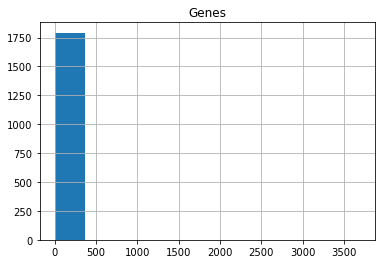

In [29]:
df_tmp.hist()

In [30]:
df_tmp.quantile(0.9)
#df_tmp['rank'] = df_tmp['Genes'].rank()

Genes    10.0
Name: 0.9, dtype: float64

In [31]:
df_tmp.head()

,GO_id,Genes
0,GO:0000009,1
1,GO:0000014,1
2,GO:0000026,1
3,GO:0000030,2
4,GO:0000033,1


In [32]:
#df_tmp.sort_values(['Genes'])
## Filter df by GO category. Ejm: function (proceses and component are removed, just keep funciton category)
is_gene_grater1 = df_tmp['Genes'] >= 2
df_tmp_infected = df_tmp[is_gene_grater1]
print('Records:'+str(len(df_tmp_infected)))
df_tmp_infected.head(5)

Records:969


,GO_id,Genes
3,GO:0000030,2
6,GO:0000036,7
8,GO:0000049,8
9,GO:0000062,3
11,GO:0000095,6


In [33]:
df_tmp_infected = df_tmp_infected.sort_values(['Genes'], ascending=False)
#goslim = df_tmp_infected['GO_slim'].tolist() -----this field is to large to plot
data = df_tmp_infected['Genes'].to_list()
#goslim = df_tmp_infected['GO_slim'].tolist()
goslim = df_tmp_infected['GO_id'].tolist()
len(goslim)

969

In [34]:
#make_pie_donut_chart
# goslim_10first = goslim[0:10]
# goslim_10first
#keep first 10 terms and set the remaining labels to zero to clear the plot 
goslim = [GO if i < 10 else '' for i, GO in enumerate(goslim)]
goslim

['GO:0003674',
 'GO:0005515',
 'GO:0003700',
 'GO:0003729',
 'GO:0003723',
 'GO:0008270',
 'GO:0016757',
 'GO:0003735',
 'GO:0004672',
 'GO:0004842',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',


In [35]:
make_pie_donut_chart

<function __main__.make_pie_donut_chart(q, lbs, title)>

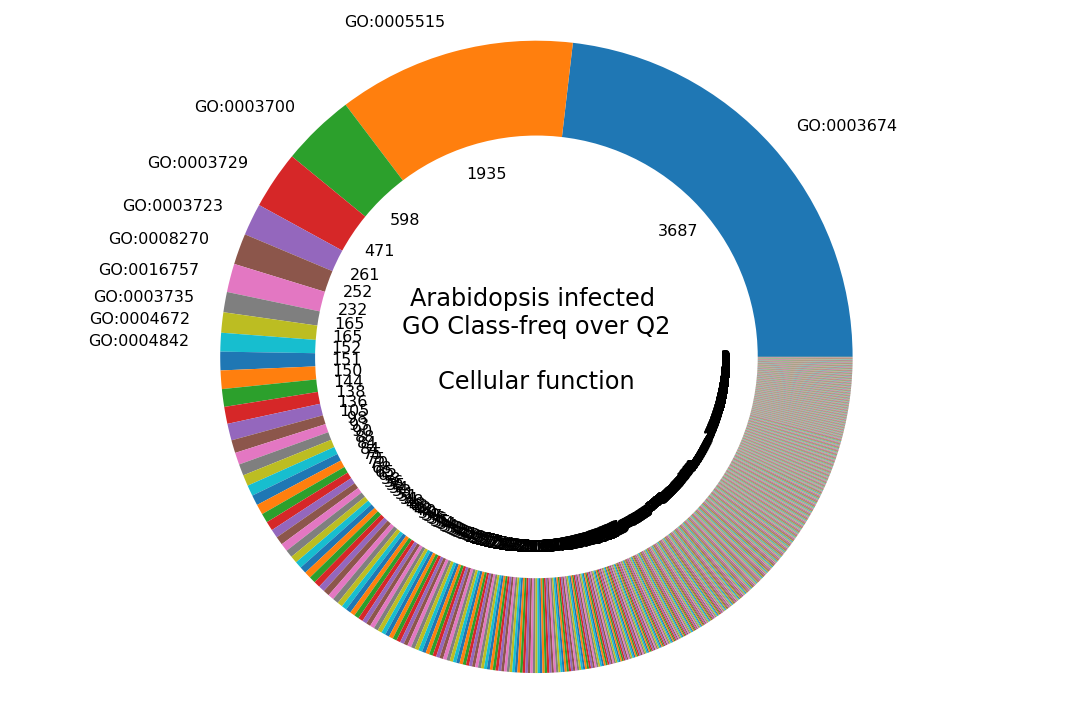

In [36]:
# plot a pie chart by GO Category
make_pie_donut_chart(data, goslim, 'Arabidopsis infected \nGO Class-freq over Q2\n\n'+ title_plot)

In [37]:
# Get the first 10
df_TopGO_terms =  df_tmp_infected.head(10)
print(title_plot)
print(sfile)
df_TopGO_terms
#lst_GO_terms_selected = df_TopGO_terms['GO_id'].tolist()
#lst_GO_terms_selected

Cellular function
matrix_E_infected.csv


,GO_id,Genes
77,GO:0003674,3687
604,GO:0005515,1935
89,GO:0003700,598
98,GO:0003729,471
93,GO:0003723,261
669,GO:0008270,252
1021,GO:0016757,232
100,GO:0003735,165
448,GO:0004672,165
522,GO:0004842,152


In [38]:
# send the GO_id(s) to a list to get the term description
lst_GO = df_TopGO_terms['GO_id'].to_list()
lst_GO

['GO:0003674',
 'GO:0005515',
 'GO:0003700',
 'GO:0003729',
 'GO:0003723',
 'GO:0008270',
 'GO:0016757',
 'GO:0003735',
 'GO:0004672',
 'GO:0004842']

In [39]:
## De este archivo se obtiene la descripcion de los GO Terminos
#df_gene_func.head(3)

**Filter df by molecular function (proceses and component are removed, just keep funciton category)**

In [40]:
#pd.set_option('display.max_colwidth', None)   ##use with GO_term
df_10TopGO_desc = df_gene_func[df_gene_func['GO_id']=='GO:0008270']
df_10TopGO_desc.head(1)

,Genes,GO_term,GO_id,TAIR_id,category,GO_slim,Evidence code,Reference
239,AT1G01210,zinc ion binding,GO:0008270,4661.0,func,other binding,IEA,AnalysisReference:501756966


In [41]:
# OJO, the sort order is not equal to the list provided
df_10TopGO_desc = df_gene_func[df_gene_func.GO_id.isin(lst_GO)]
df_10TopGO_desc.GO_term.unique()

array(['DNA-binding transcription factor activity',
       'molecular_function_unknown', 'protein binding', 'mRNA binding',
       'structural constituent of ribosome', 'zinc ion binding',
       'transferase activity, transferring glycosyl groups',
       'ubiquitin-protein transferase activity', 'RNA binding',
       'protein kinase activity'], dtype=object)

### Load expression matrix to merge the gene functions asociated
### Arabidopsis HEALTHY dataset

In [42]:
## FILE TO ANALYZE
sfile = 'matrix_D_healthy.csv'

In [43]:
# LOAD FILE
df_healthy_MatD = pd.read_csv("../results-data/matrices_de_expresion/" + sfile,  sep='\t') 

In [44]:
print(df_gene_func.shape)
print(df_healthy_MatD.shape)

(22340, 8)
(19792, 9)


In [45]:
df_healthy_MatD_GO_Category = df_healthy_MatD.merge(df_gene_func,on=['Genes'],how='left')
df_healthy_MatD_GO_Category.shape

(19792, 16)

### Plot categorical gene function in the raw matrix (infected)

In [46]:
#df_infected_MatE_GOFunc
df_plt_GOSlim = df_healthy_MatD_GO_Category[['Genes','GO_id']]
df_plt_GOSlim.head(3)

,Genes,GO_id
0,AT1G01020,GO:0003674
1,AT1G01030,GO:0005515
2,AT1G01040,GO:0005515


In [47]:
df_tmp = df_plt_GOSlim.groupby(['GO_id']).count()
print(len(df_tmp))
df_tmp.tail(8)
df_tmp.reset_index(level='GO_id', col_level=1, inplace=True)
df_tmp.head(3)

1778


,GO_id,Genes
0,GO:0000009,1
1,GO:0000014,1
2,GO:0000026,1


In [48]:
df_tmp.describe()

,Genes
count,1778.000000
mean,9.206412
std,98.936578
min,1.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,3579.000000


In [49]:
df_tmp.quantile(0.5)
#df_tmp['rank'] = df_tmp['Genes'].rank()

Genes    2.0
Name: 0.5, dtype: float64

In [50]:
#df_tmp.sort_values(['Genes'])
## Filter df by GO category. Ejm: function (proceses and component are removed, just keep funciton category)
is_gene_grater1 = df_tmp['Genes'] >= 2
df_tmp_healthy = df_tmp[is_gene_grater1]
print('Records:'+str(len(df_tmp_healthy)))
df_tmp_healthy.head(5)

Records:964


,GO_id,Genes
3,GO:0000030,2
6,GO:0000036,7
8,GO:0000049,7
9,GO:0000062,3
11,GO:0000095,6


In [51]:
df_tmp_healthy = df_tmp_healthy.sort_values(['Genes'], ascending=False)
#goslim = df_tmp_infected['GO_slim'].tolist() -----this field is to large to plot
data2 = df_tmp_healthy['Genes'].to_list()
#goslim = df_tmp_healthy['GO_slim'].tolist()
goslim = df_tmp_healthy['GO_id'].tolist()
len(goslim)

964

In [52]:
#data2 = df_tmp_healthy['Genes'].to_list()
#goslim2 = df_tmp_healthy['GO_id'].tolist()

#make_pie_donut_chart
# goslim_10first = goslim[0:10]
# goslim_10first
#keep first 10 terms and set the remaining labels to zero to clear the plot 
goslim = [GO if i < 10 else '' for i, GO in enumerate(goslim)]
goslim

['GO:0003674',
 'GO:0005515',
 'GO:0003700',
 'GO:0003729',
 'GO:0003723',
 'GO:0008270',
 'GO:0016757',
 'GO:0003735',
 'GO:0004672',
 'GO:0004842',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',


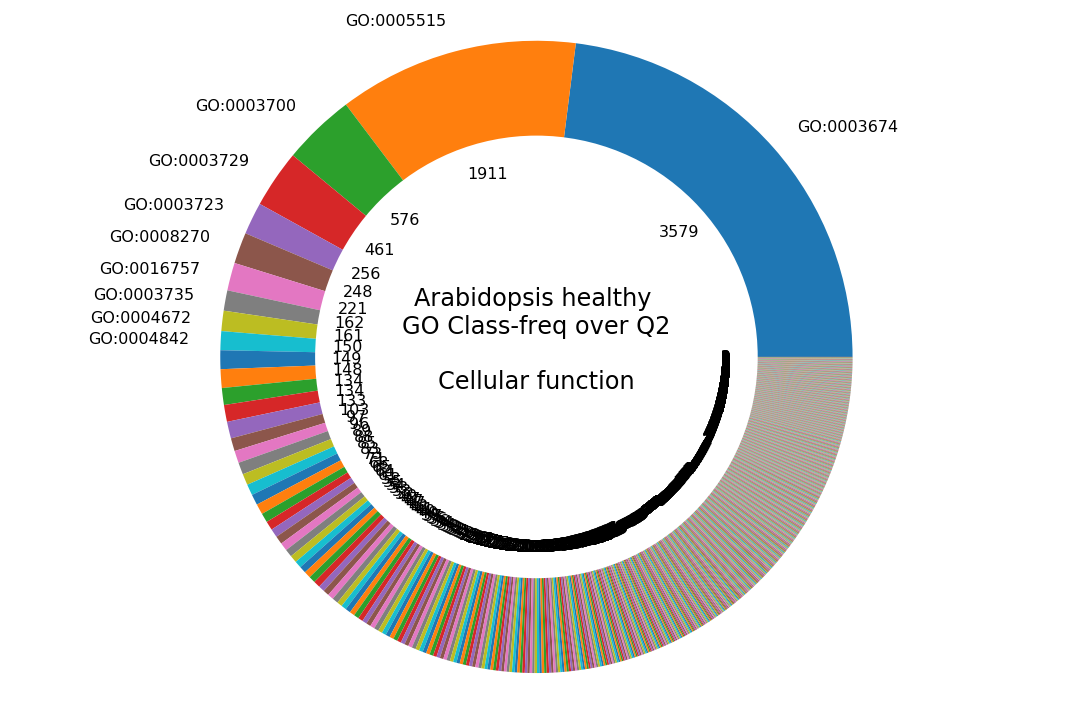

In [53]:
# plot a pie chart by GO Category
make_pie_donut_chart(data2, goslim, 'Arabidopsis healthy \nGO Class-freq over Q2\n\n'+ title_plot)
#make_pie_donut_chart(data2, goslim, "Arabidopsis healthy \nGO "+ title_plot +"\nGenes over Q2")

In [54]:
df_TopGO_terms =  df_tmp_healthy.head(10)
df_TopGO_terms

,GO_id,Genes
77,GO:0003674,3579
603,GO:0005515,1911
89,GO:0003700,576
98,GO:0003729,461
93,GO:0003723,256
668,GO:0008270,248
1015,GO:0016757,221
100,GO:0003735,162
447,GO:0004672,161
521,GO:0004842,150


In [55]:
#df_gene_func.head(3)

In [56]:
## Filter df by molecular component (proceses and component are removed, just keep funciton category)
pd.set_option('display.max_colwidth', None)
df_10TopGO_desc = df_gene_func[df_gene_func['GO_id']=='GO:0003674']
df_10TopGO_desc.head(3)

,Genes,GO_term,GO_id,TAIR_id,category,GO_slim,Evidence code,Reference
6,AT1G01020,molecular_function_unknown,GO:0003674,3226.0,func,unknown molecular functions,ND,Communication:1345790
162,AT1G01110,molecular_function_unknown,GO:0003674,3226.0,func,unknown molecular functions,ND,Communication:1345790
183,AT1G01130,molecular_function_unknown,GO:0003674,3226.0,func,unknown molecular functions,ND,Communication:1345790


### Integrate the two resulting subsets to plot as comparison

In [57]:
df_infected = df_tmp_infected.rename({'Genes':'Genes_Inf'}, axis='columns')
print(len(df_infected), 'GO classes in the '+ title_plot +' category in the infected dataset')
df_healthy = df_tmp_healthy.rename({'Genes':'Genes_Healthy'}, axis='columns')
print(len(df_healthy), 'GO classes in the '+ title_plot +' category in the healthy dataset')

969 GO classes in the Cellular function category in the infected dataset
964 GO classes in the Cellular function category in the healthy dataset


In [58]:
# merge both datasets based on the locus of the infected dataset
df_plt_comp = df_infected.merge(df_healthy,on=['GO_id'],how='outer')
df_plt_comp.shape

(986, 3)

In [59]:
print(len(df_plt_comp))
df_plt_comp

986


,GO_id,Genes_Inf,Genes_Healthy
0,GO:0003674,3687.0,3579.0
1,GO:0005515,1935.0,1911.0
2,GO:0003700,598.0,576.0
3,GO:0003729,471.0,461.0
4,GO:0003723,261.0,256.0
...,...,...,...
981,GO:0016899,NaN,2.0
982,GO:0016707,NaN,2.0
983,GO:0016296,NaN,2.0
984,GO:0015141,NaN,2.0


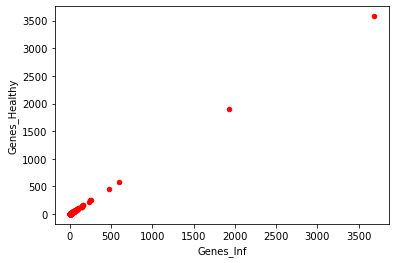

In [60]:
# a scatter plot comparing num_children and num_pets
df_plt_comp.plot(kind='scatter',x='Genes_Inf',y='Genes_Healthy',color='red')
plt.show()

In [61]:
df_plt_comp.fillna(0)
df_plt_comp.sort_values(['Genes_Inf'])
df_plt_comp

,GO_id,Genes_Inf,Genes_Healthy
0,GO:0003674,3687.0,3579.0
1,GO:0005515,1935.0,1911.0
2,GO:0003700,598.0,576.0
3,GO:0003729,471.0,461.0
4,GO:0003723,261.0,256.0
...,...,...,...
981,GO:0016899,NaN,2.0
982,GO:0016707,NaN,2.0
983,GO:0016296,NaN,2.0
984,GO:0015141,NaN,2.0


In [62]:
# df_plt_comp.iloc[[13,26,27]]

### Get the genes with missing data
Here we are infering that this genes (On/Off) means something

In [81]:
#filter data with missing data
df_plt_comp.columns[df_plt_comp.isna().any()]
df_plt_comp.isna().sum()

Index(['Genes_Inf', 'Genes_Healthy'], dtype='object')

In [64]:
#get the row index of the missing values
lst_nan = df_plt_comp.index[df_plt_comp.isna().any(axis=1)].to_list()
lst_nan[:5]

[540, 542, 661, 689, 710]

In [65]:
# use the method query to get the rows with this NaN values
df_GO_Differences = df_plt_comp.iloc[lst_nan]
df_GO_Differences
df_GO_Differences = df_GO_Differences.sort_values(['Genes_Inf'], ascending=True)

In [82]:
df_GO_Differences

,GO_id,Genes_Inf,Genes_Healthy
840,GO:0015145,2.0,NaN
907,GO:0004612,2.0,NaN
888,GO:0036381,2.0,NaN
884,GO:0042054,2.0,NaN
881,GO:0042282,2.0,NaN
880,GO:0042349,2.0,NaN
864,GO:0016744,2.0,NaN
862,GO:0016756,2.0,NaN
850,GO:0015368,2.0,NaN
848,GO:0015232,2.0,NaN


In [68]:
labels = df_GO_Differences['GO_id'].tolist()
len_inf = len(labels)
print(len_inf, 'GO terms exclusive expressed in the infected dataset')
labels[:5]
#Name_list = df["Name"].tolist()

39 GO terms exclusive expressed in the infected dataset


['GO:0015145', 'GO:0004612', 'GO:0036381', 'GO:0042054', 'GO:0042282']

In [69]:
print(plt.style.available)

['seaborn-whitegrid', 'seaborn-poster', 'tableau-colorblind10', 'seaborn-pastel', 'seaborn-white', 'seaborn-talk', 'classic', 'seaborn-dark-palette', 'seaborn-notebook', 'seaborn-deep', 'seaborn-darkgrid', 'bmh', '_classic_test', 'fast', 'seaborn', 'fivethirtyeight', 'seaborn-dark', 'seaborn-bright', 'seaborn-muted', 'grayscale', 'dark_background', 'Solarize_Light2', 'seaborn-ticks', 'ggplot', 'seaborn-colorblind', 'seaborn-paper']


PLOT FOR BIOLOGICAL FUNCTION

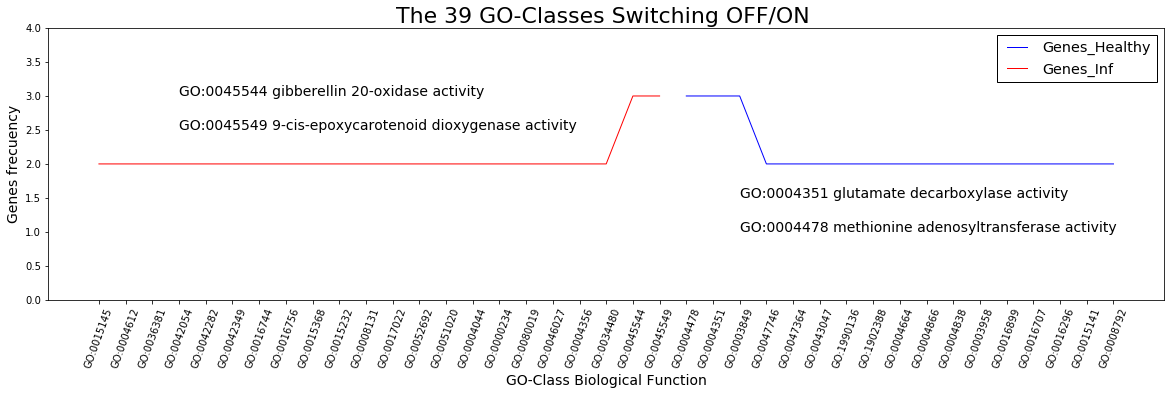

In [70]:
# gca stands for 'get current axis'
x = np.arange(len(labels))
fig, ax = plt.subplots(figsize=(20,5))
plt.style.use('classic')

ax.set_xticks(x)
ax.set_xticklabels(labels)
#ax.legend()

df_GO_Differences.plot(kind='line',x='GO_id',y='Genes_Healthy', color='blue',ax=ax)
df_GO_Differences.plot(kind='line',x='GO_id',y='Genes_Inf', color='red', ax=ax)
ax.set_ylabel('Genes frecuency', color='black', fontsize=14)
ax.set_ylim(auto=False, ymin=0, ymax=4)
ax.set_xlabel('GO-Class Biological Function', color='black', fontsize=14)
ax.set_title("The "+ str(len_inf) +" GO-Classes Switching OFF/ON ", fontsize=22)

# automatically adjusted y-axis
#barplot(dat, beside=TRUE, ylim=range(pretty(c(0, dat))))

# scale_factor = 1
# xmin, xmax = plt.xlim()
# ymin, ymax = plt.ylim()
# plt.xlim(xmin * scale_factor, xmax * scale_factor)
# plt.ylim(ymin * scale_factor, ymax * scale_factor)

# Used to label the GO terms in the functional category
plt.text(3,3,'GO:0045544 gibberellin 20-oxidase activity', fontsize=14)
plt.text(3,2.5,'GO:0045549 9-cis-epoxycarotenoid dioxygenase activity', fontsize=14)
plt.text(24,1.5,'GO:0004351 glutamate decarboxylase activity', fontsize=14)
plt.text(24,1,'GO:0004478 methionine adenosyltransferase activity', fontsize=14)
plt.xticks(rotation=70, color='black')

plt.show()


In [79]:
df_gene_func[df_gene_func['GO_id']=='GO:0036381'][['Genes','GO_term','GO_slim']]

,Genes,GO_term,GO_slim
74316,AT2G38230,pyridoxal 5'-phosphate synthase (glutamine hydrolysing) activity,catalytic activity
153795,AT5G01410,pyridoxal 5'-phosphate synthase (glutamine hydrolysing) activity,catalytic activity


In [88]:
df_gene_func[df_gene_func['GO_id'].isin(labels)][['GO_id','Genes','GO_term','GO_slim']].to_csv("../results-data/genes_mutually_excluded_byGO_func.csv",  sep='\t') 

In [77]:
df_infected_MatE
df_infected_MatE[df_infected_MatE['Genes']=='AT4G21480'] #[['Genes','GO_term','GO_slim']]

,Genes,Bc12,Ch40.2,Ch22.2,Ch22.1,Ch22,Ch22.3,Bc12.1,Bc24.1,Bc18.1,Ch40.3,Ch40.1,Bc18,Bc24,Ch40
13835,AT4G21480,0.816056,0.614195,1.221054,1.153754,0.982671,1.117151,0.922049,0.862474,0.698752,0.771139,0.65019,0.952747,1.119209,0.889988
